STUFF TO DO!!!!


- add variance, max and min for each model

- put the row names translated by google translate

- Should you just use 1 dataset from kaggle or integrate with other ones? Maybe just integrate the dataset from Milan with quartier data?

- Should you make a map of milan with the geographical locations of the quartiers to be connected with your income data? Do it only if it does not take too long

- hyperparameter tuning. Only after you are 100 percent sure of which models to use.

- Also try some neural networks? For them, in order to decrease computational speed, you can try do use PCA before.

- add descriptions of the stuff that you do in a way that it is presentable

- make the descriptive statistic part. finish it and make it presentable

- explain code with comments where you did not do it already

- (maybe): For every rent, add:
Distance from the centre of the city (in case, do it before running the models)




























# Setting up the environment

## Importing libraries

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels as sm
import numpy as np
import sklearn

In [3]:
# if necessary, set your directory
#os.chdir('C:/Users/u790622/Downloads')

# Descriptive Statistics

In [4]:
# Clean up this

# 1) Divide into subtitles and sub-subtitles
# 2) Actually make the descriptive statistics lol

## Rental Announcements Dataset

### Importing the data

In [3]:
df = pd.read_csv('rents/rents_clean.csv')
pd.set_option('display.max_columns', None)

### Initial Structure

In [6]:
'''df.rename(columns={
    'regione': 'region',
    'citta': 'city',
    'quartiere': 'district',
    'prezzo': 'price',
    'datetime': 'datetime',
    'posti auto': 'parking_spaces',
    'bagni per stanza': 'bathrooms_per_room',
    'bagni': 'bathrooms',
    'stanze': 'rooms',
    'ultimo piano': 'top_floor',
    'stato': 'condition',
    'classe energetica': 'energy_class',
    'vista mare': 'sea_view',
    'riscaldamento centralizzato': 'central_heating',
    'superficie': 'area',
    'arredato': 'furnished',
    'balcone': 'balcony',
    'impianto tv': 'tv_system',
    'esposizione esterna': 'external_exposure',
    'fibra ottica': 'fiber_optic',
    'cancello elettrico': 'electric_gate',
    'cantina': 'cellar',
    'giardino comune': 'shared_garden',
    'giardino privato': 'private_garden',
    'impianto allarme': 'alarm_system',
    'portiere': 'doorman',
    'piscina': 'pool',
    'villa': 'villa',
    'intera proprieta': 'full_ownership',
    'appartamento': 'apartment',
    'attico': 'penthouse',
    'loft': 'loft',
    'mansarda': 'attic'
}, inplace=True)'''

In [4]:
# Translate rownames from Italian to English

from googletrans import Translator

def Translate(italian_input):
    translator = Translator()
    return translator.translate(italian_input).text

columns_translated = [Translate(c) for c in df.columns]
#columns_translated[12], columns_translated[-1] = "sea_view", "mansard"

columns_translated = [c.replace(" ", "_") for c in columns_translated]
df.columns = columns_translated
df.head()


# Code from https://www.kaggle.com/code/tommasoramella/eda-exploratory-analysis

AttributeError: 'NoneType' object has no attribute 'group'

In [8]:
print(df['condition'].unique())
print(df['energy_class'].unique())

['ottimo / ristrutturato' 'buono / abitabile' 'nuovo / in costruzione' nan
 'da ristrutturare']
['E' 'G' nan 'C' 'F' 'B' 'D' 'A' ',']


In [9]:
condition_categories = {
    'nuovo / in costruzione': 'new / under construction',
    'ottimo / ristrutturato': 'excellent / renovated',
    'buono / abitabile': 'good / habitable',
    'da ristrutturare': 'to be renovated'
}
df['condition'] = df['condition'].replace(condition_categories)
del condition_categories

In [10]:
print(df.shape)
# keeping only Milan
df = df[df['city'] == 'Milano']
df.drop(columns=['city','region'], axis='columns', inplace=True)
print(df.shape)

(126237, 33)
(18013, 31)


In [11]:
df.head()

,district,price,datetime,parking_spaces,bathrooms_per_room,bathrooms,rooms,top_floor,condition,energy_class,sea_view,central_heating,area,furnished,balcony,tv_system,external_exposure,fiber_optic,electric_gate,cellar,shared_garden,private_garden,alarm_system,doorman,pool,villa,full_ownership,apartment,penthouse,loft,attic
0,Centrale,1800.0,2023-07-03,1,0.333333,1.0,3.0,0,excellent / renovated,E,0.0,0.0,NaN,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
12,Isola,1800.0,2023-07-03,0,0.500000,1.0,2.0,1,new / under construction,B,0.0,0.0,63.0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0
505,Portello - Parco Vittoria,1100.0,2023-09-03,0,0.500000,1.0,2.0,0,excellent / renovated,D,0.0,1.0,65.0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0
517,Pagano,6000.0,2023-09-03,0,0.400000,2.0,5.0,1,good / habitable,E,0.0,1.0,180.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
518,Giambellino,1350.0,2023-02-14,0,0.500000,1.0,2.0,0,excellent / renovated,F,0.0,1.0,60.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0


### Cleaning the Dataset

#### General Cleaning

In [12]:
# transforming categorical variables to dummies

df = pd.get_dummies(df, columns=['condition', 'energy_class'], prefix=None, drop_first=True, dummy_na=True)

# Convert all columns that are the result of get_dummies to integer type
df = df.astype({col: int for col in df.select_dtypes(include=['uint8', 'bool']).columns})

# converting time in year and month dummies
df['datetime'] = pd.to_datetime(df['datetime'])

first_observation_day = df['datetime'].min().date()
last_observation_day = df['datetime'].max().date()
period_length = last_observation_day - first_observation_day

print("First observation day:", first_observation_day)
print("Last observation day:", last_observation_day)
print("Period length:", period_length.days, "days")
del first_observation_day, last_observation_day, period_length

df['month'] = df['datetime'].dt.month.astype('category')
df['year'] = df['datetime'].dt.year.astype('category')
df.drop('datetime', axis=1, inplace=True)

First observation day: 2021-01-12
Last observation day: 2023-12-07
Period length: 1059 days


In [13]:
df.head()

,district,price,parking_spaces,bathrooms_per_room,bathrooms,rooms,top_floor,sea_view,central_heating,area,furnished,balcony,tv_system,external_exposure,fiber_optic,electric_gate,cellar,shared_garden,private_garden,alarm_system,doorman,pool,villa,full_ownership,apartment,penthouse,loft,attic,condition_good / habitable,condition_new / under construction,condition_to be renovated,condition_nan,energy_class_A,energy_class_B,energy_class_C,energy_class_D,energy_class_E,energy_class_F,energy_class_G,energy_class_nan,month,year
0,Centrale,1800.0,1,0.333333,1.0,3.0,0,0.0,0.0,NaN,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,7,2023
12,Isola,1800.0,0,0.500000,1.0,2.0,1,0.0,0.0,63.0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,7,2023
505,Portello - Parco Vittoria,1100.0,0,0.500000,1.0,2.0,0,0.0,1.0,65.0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,9,2023
517,Pagano,6000.0,0,0.400000,2.0,5.0,1,0.0,1.0,180.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,9,2023
518,Giambellino,1350.0,0,0.500000,1.0,2.0,0,0.0,1.0,60.0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,2023


In [14]:
# Milan has many observation that contain NA (around 1/3)
print(df.shape)
print(df.dropna().shape)

(18013, 42)
(13703, 42)


#### Reducing the amount of NAs

In [15]:
# in order to keep as many informations as possible, we want to maintain rows that have NAs in categorical variables that are not fundamental and 
# that can be almost always correctly replaced by a value if an NA is encountered

# We know that if a charateristic is not listed, it might be either because the owner forgot, or because it is missing and listing it as missing
# poses no benefit to the lister. For example, if pool is not listed, it likely means that is not present, if we assume that the majority
# of houses in Milan do not have a pool.
# The same reasoning can be applied to multiple variables such as private_garden, doorman, balcony etc...

# For this reason, I believe it makes sense to substitute a value of 0 to NAs when such charateristics are very unlikely to be present in the first place
# and are positive characteristics

# Making the opposite reasoning, if a characteristic is very present and it is a negative characteristics,
# there is an incentive to the lister to not declare it. One example of this is the house being an apartment
# If the house was not an apartment, but instead a villa, it would have been listed as such, since it is convenient for the landlord.

# Firstly we check which variables have NAs.

print(df.isna().sum())

district                                 4
price                                   73
parking_spaces                           0
bathrooms_per_room                    1156
bathrooms                              820
rooms                                  647
top_floor                                0
sea_view                                 4
central_heating                       3107
area                                   697
furnished                                0
balcony                                  0
tv_system                                0
external_exposure                        0
fiber_optic                              0
electric_gate                            0
cellar                                   0
shared_garden                            0
private_garden                           0
alarm_system                             0
doorman                                  0
pool                                     0
villa                                    0
full_owners

In [16]:
# The majority of variables actually do not have NAs. This is relatively unexpected.
# Also, the majority of NAs are in non-categorical variables.

# We can only safely assign a value of 0 to categorical variables that have a mean close to 0. 
# central_heating and sea_view seem to be categorical. 

# Also, the sea_view variable might sound a bit suspicious considering the fact 
# that I haven't seen much sea in my 3 years in Milan, but I might not have seached well enough!
# Anyway, we check if the variables are actually categorical.

print(df['central_heating'].unique())
print(df['sea_view'].unique())

[ 0.  1. nan]
[ 0. nan]


In [17]:
# yes, they are
# The 'Sea view' variable contains only zeros or missing values, 
# which is expected since Milan is landlocked — there's no sea in sight... yet!
# Interestingly, one of my favorite artists (Tedua, from Genova) mentioned in his song, "I brought the sea to Milan."
# This lyric refers to the fact that he exported the Genovese style of rap, 
# known for its melodic and syncopated beats, to Milan, where rap tends to be more hardcore.
# You can listen to the song here: https://youtu.be/0gimwwCkvp8?si=bw1IY_wfd8JeOHkT
# Despite the poetic merger of musical styles, I must remove the 'sea_view' variable from my analysis, 
# as the unforgiving nature of statistical results crushes the hopes of a Milanese sea.
df.drop(['sea_view'], axis=1, inplace=True)

In [18]:
# now we check how much central heating is adopted 
# getting their mean (escluding NAs)
print(df['central_heating'].mean())

0.4922849859117134


In [19]:
# Half of the houses that responded to the question have it, and half do not.
# This means that we cannot assume anything about NA values.

# Therefore, to save observations, our last resort is to encode central heating's NAs as a dummy variable.
df = pd.get_dummies(df, columns=['central_heating'], prefix=None, drop_first=True, dummy_na=True)
df = df.astype({col: int for col in df.select_dtypes(include=['uint8', 'bool']).columns})

# we exclude from our dataset the remaining NAs
df = df.dropna()
print(df.shape)

(16555, 42)


In [20]:
district_counts = df['district'].value_counts()

from IPython.display import display
pd.set_option('display.max_rows', None)
# Print the counts
display(district_counts)

district
Città Studi                        557
Centrale                           531
Navigli - Darsena                  507
Cimiano                            456
Porta Romana - Medaglie d'Oro      403
Buenos Aires                       377
Isola                              311
Carrobbio                          308
Solari                             307
Paolo Sarpi                        286
Sempione                           275
Porta Venezia                      273
Montenero                          260
Dergano                            247
Ripamonti                          247
Bovisa                             244
Indipendenza                       241
Moscova                            231
Corvetto                           226
Ticinese                           225
Duomo                              218
Giambellino                        209
San Siro                           208
Lodi - Brenta                      205
Pezzotti - Meda                    201
Quadronno - Croc

In [21]:
district_to_replace = district_counts[district_counts < 10].index

# Replace these quartier values with 'other'
df.loc[df['district'].isin(district_to_replace), 'district'] = 'Other'

# use the first, just testing now without drop first
#df = pd.get_dummies(df, columns=['district'], prefix=None, drop_first=True, dummy_na=True)
df = pd.get_dummies(df, columns=['district'], prefix=None, drop_first=False, dummy_na=True)
df.head()

,price,parking_spaces,bathrooms_per_room,bathrooms,rooms,top_floor,area,furnished,balcony,tv_system,external_exposure,fiber_optic,electric_gate,cellar,shared_garden,private_garden,alarm_system,doorman,pool,villa,full_ownership,apartment,penthouse,loft,attic,condition_good / habitable,condition_new / under construction,condition_to be renovated,condition_nan,energy_class_A,energy_class_B,energy_class_C,energy_class_D,energy_class_E,energy_class_F,energy_class_G,energy_class_nan,month,year,central_heating_1.0,central_heating_nan,district_Affori,district_Amendola - Buonarroti,district_Arco della Pace,district_Arena,district_Argonne - Corsica,district_Ascanio Sforza,district_Baggio,district_Bande Nere,district_Barona,district_Bicocca,district_Bignami - Ponale,district_Bisceglie,district_Bocconi,district_Bologna - Sulmona,district_Borgogna - Largo Augusto,district_Bovisa,district_Brera,district_Bruzzano,district_Buenos Aires,district_Ca' Granda,district_Cadore,district_Cadorna - Castello,district_Cantalupa - San Paolo,district_Carrobbio,district_Cascina Merlata - Musocco,district_Cascina dei Pomi,district_Casoretto,district_Cenisio,district_Centrale,district_Cermenate - Abbiategrasso,district_Certosa,district_Chiesa Rossa,district_Cimiano,district_Città Studi,district_City Life,district_Comasina,district_Corso Genova,district_Corso San Gottardo,district_Corvetto,district_Crescenzago,district_De Angeli,district_Dergano,district_Dezza,district_Duomo,district_Famagosta,district_Farini,district_Frua,district_Gallaratese,district_Gambara,district_Garibaldi - Corso Como,district_Ghisolfa - Mac Mahon,district_Giambellino,district_Gorla,district_Gratosoglio,district_Greco - Segnano,district_Guastalla,district_Indipendenza,district_Inganni,district_Isola,district_Istria,district_Lambrate,district_Lanza,district_Lodi - Brenta,district_Lorenteggio,district_Maggiolina,district_Martini - Insubria,district_Melchiorre Gioia,district_Missori,district_Molise - Cuoco,district_Monte Rosa - Lotto,district_Montenero,district_Morgagni,district_Moscova,district_Navigli - Darsena,district_Niguarda,district_Ortica,district_Other,district_Pagano,district_Palestro,district_Paolo Sarpi,district_Parco Lambro,district_Parco Trotter,district_Pasteur,district_Pezzotti - Meda,district_Piave - Tricolore,district_Piazza Napoli,district_Piazzale Siena,district_Plebisciti - Susa,district_Ponte Nuovo,district_Porta Nuova,district_Porta Romana - Medaglie d'Oro,district_Porta Venezia,district_Porta Vittoria,district_Portello - Parco Vittoria,district_Prato Centenaro,district_Precotto,district_Primaticcio,district_Quadrilatero della Moda,district_Quadronno - Crocetta,district_Quartiere Adriano,district_Quartiere Feltre,district_Quartiere Forlanini,district_Quarto Cagnino,district_Quarto Oggiaro,district_Repubblica,district_Ripamonti,district_Rogoredo,district_Rovereto,district_Rubattino,district_San Babila,district_San Carlo,district_San Siro,district_San Vittore,district_Sant'Ambrogio,district_Santa Giulia,district_Scala - Manzoni,district_Sempione,district_Solari,district_Ticinese,district_Tre Castelli - Faenza,district_Tripoli - Soderini,district_Turati,district_Turro,district_Udine,district_Vercelli - Wagner,district_Viale Ungheria - Mecenate,district_Vigentino - Fatima,district_Villa San Giovanni,district_Vincenzo Monti,district_Washington,district_Zara,district_nan
12,1800.0,0,0.500000,1.0,2.0,1,63.0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,7,2023,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

### Final Cleaning & Predictors Dataset

In [22]:
# Excluding apartments priced below or at €500 since I individually verified each one of them
# and they are all incorrectly listed as whole units in the "Immobiliare.it" rental section 
# when they are actually just single rooms.
df = df[df['price'] > 500]
print(df.shape)

(16525, 173)


In [23]:
# exclude quartier for now, think later what to do with them. PROBABLY USE GEOGRAPHICAL LOCATIONS AND GPD? FOR THEM
#df.drop(columns=['district'], axis='columns', inplace=True)

In [24]:
#df.describe(include='all', datetime_is_numeric=True)
df.describe(include='all')

,price,parking_spaces,bathrooms_per_room,bathrooms,rooms,top_floor,area,furnished,balcony,tv_system,external_exposure,fiber_optic,electric_gate,cellar,shared_garden,private_garden,alarm_system,doorman,pool,villa,full_ownership,apartment,penthouse,loft,attic,condition_good / habitable,condition_new / under construction,condition_to be renovated,condition_nan,energy_class_A,energy_class_B,energy_class_C,energy_class_D,energy_class_E,energy_class_F,energy_class_G,energy_class_nan,month,year,central_heating_1.0,central_heating_nan,district_Affori,district_Amendola - Buonarroti,district_Arco della Pace,district_Arena,district_Argonne - Corsica,district_Ascanio Sforza,district_Baggio,district_Bande Nere,district_Barona,district_Bicocca,district_Bignami - Ponale,district_Bisceglie,district_Bocconi,district_Bologna - Sulmona,district_Borgogna - Largo Augusto,district_Bovisa,district_Brera,district_Bruzzano,district_Buenos Aires,district_Ca' Granda,district_Cadore,district_Cadorna - Castello,district_Cantalupa - San Paolo,district_Carrobbio,district_Cascina Merlata - Musocco,district_Cascina dei Pomi,district_Casoretto,district_Cenisio,district_Centrale,district_Cermenate - Abbiategrasso,district_Certosa,district_Chiesa Rossa,district_Cimiano,district_Città Studi,district_City Life,district_Comasina,district_Corso Genova,district_Corso San Gottardo,district_Corvetto,district_Crescenzago,district_De Angeli,district_Dergano,district_Dezza,district_Duomo,district_Famagosta,district_Farini,district_Frua,district_Gallaratese,district_Gambara,district_Garibaldi - Corso Como,district_Ghisolfa - Mac Mahon,district_Giambellino,district_Gorla,district_Gratosoglio,district_Greco - Segnano,district_Guastalla,district_Indipendenza,district_Inganni,district_Isola,district_Istria,district_Lambrate,district_Lanza,district_Lodi - Brenta,district_Lorenteggio,district_Maggiolina,district_Martini - Insubria,district_Melchiorre Gioia,district_Missori,district_Molise - Cuoco,district_Monte Rosa - Lotto,district_Montenero,district_Morgagni,district_Moscova,district_Navigli - Darsena,district_Niguarda,district_Ortica,district_Other,district_Pagano,district_Palestro,district_Paolo Sarpi,district_Parco Lambro,district_Parco Trotter,district_Pasteur,district_Pezzotti - Meda,district_Piave - Tricolore,district_Piazza Napoli,district_Piazzale Siena,district_Plebisciti - Susa,district_Ponte Nuovo,district_Porta Nuova,district_Porta Romana - Medaglie d'Oro,district_Porta Venezia,district_Porta Vittoria,district_Portello - Parco Vittoria,district_Prato Centenaro,district_Precotto,district_Primaticcio,district_Quadrilatero della Moda,district_Quadronno - Crocetta,district_Quartiere Adriano,district_Quartiere Feltre,district_Quartiere Forlanini,district_Quarto Cagnino,district_Quarto Oggiaro,district_Repubblica,district_Ripamonti,district_Rogoredo,district_Rovereto,district_Rubattino,district_San Babila,district_San Carlo,district_San Siro,district_San Vittore,district_Sant'Ambrogio,district_Santa Giulia,district_Scala - Manzoni,district_Sempione,district_Solari,district_Ticinese,district_Tre Castelli - Faenza,district_Tripoli - Soderini,district_Turati,district_Turro,district_Udine,district_Vercelli - Wagner,district_Viale Ungheria - Mecenate,district_Vigentino - Fatima,district_Villa San Giovanni,district_Vincenzo Monti,district_Washington,district_Zara,district_nan
count,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.00000,16525.000000,16525.000000,16525.000000,16525.0,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.0,16525.0,16525.000000,16525.000000,16525.0,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.000000,16525.0,16525.0,16525.000000,16525.000000,16525,16525,16525,16525,16525,16525,16525,16525,16525,16525,16525,16525,16525,16525,16525,16525,16525,16

In [25]:
# dropping variables that have only 0 values for all listings in the city of Milan
df.drop(['tv_system','alarm_system','doorman','full_ownership'], axis=1, inplace=True)

In [26]:
# creating our predictor dataset
df_predictors = df.copy()
df_predictors.drop("price", axis='columns', inplace=True)

## Geographical Dataset

### CLEAN UP THE SHIT IN THE NEXT CELLS

### Importing the data

In [27]:
import geopandas as gpd

# Load the shapefile
gdf = gpd.read_file("Municipi_RDN2008/Municipi.shp")




ModuleNotFoundError: No module named 'geopandas'

In [ ]:
gdf

In [ ]:
import folium

# Create a map centered around Milan
m = folium.Map(location=[45.4641, 9.1919], zoom_start=12)

# Add a GeoJSON overlay
folium.GeoJson(gdf, name='Milan Zone').add_to(m)

# Add a layer control panel
folium.LayerControl().add_to(m)

# Display the map
m.save('milan_map.html')

In [ ]:
from IPython.display import IFrame

# Display the HTML file within the Jupyter Notebook as an inline frame
IFrame(src='milan_map.html', width=700, height=600)

In [ ]:
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import time

# Sample DataFrame with district names

# Append ', Milan' to each district name for better geocoding results
df['District_Data'] = df['district'] + ', Milan'

# Initialize the geolocator
geolocator = Nominatim(user_agent="geoapiExercises")

# Using rate limiter to avoid hitting service limits
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Function to apply geocoding
def get_location(row):
    location = geocode(row['District_Data'])
    if location:
        return pd.Series([location.latitude, location.longitude], index=['Latitude', 'Longitude'])
    return pd.Series([None, None], index=['Latitude', 'Longitude'])

# Apply the geocoding function to each row
df[['Latitude', 'Longitude']] = df.apply(get_location, axis=1)

# Display the DataFrame with coordinates
print(df)

In [ ]:
'''average_rent = df.groupby('District')['Rent'].mean().reset_index()
average_rent.columns = ['District', 'AverageRent']

milan_dis = milan_dis.merge(average_rent, how='left', left_on='name', right_on='District')'''

In [ ]:
m = folium.Map(location=[45.4641, 9.1919], zoom_start=12)

# Add the choropleth layer
folium.Choropleth(
    geo_data=districts,
    name='choropleth',
    data=districts,
    columns=['District', 'AverageRent'],
    key_on='feature.properties.District',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Average Rent by District in Milan'
).add_to(m)

folium.LayerControl().add_to(m)

# Save and display the map
m.save('milan_rent_map.html')
m

In [ ]:
from shapely.geometry import Point

# Example points (longitude, latitude)
#point1 = Point(-72.1235, 42.3521)
#point2 = Point(-72.1236, 42.3522)

# Calculate the distance in degrees (not in meters or kilometers!)
#distance = point1.distance(point2)

# To convert degrees to more standard units like meters, you might need additional steps
#print("Distance in degrees:", distance)

In [ ]:
import requests
import json

# THIS CELL AND THE NEXT ONES DO NOT WORK. FIND SOME GOOD DATASETS... or go find God.

# URL of the ArcGIS REST service endpoint for the "Quartieri" layer
url = "https://geoportale.comune.milano.it/arcgis/rest/services/OperationalLayers/40_Quartieri/MapServer/0/query"

# Parameters for querying the service
params = {
    "where": "1=1",  # This condition means 'return all features'
    "outFields": "*",  # Return all fields
    "outSR": "4326",  # Output spatial reference: WGS 84
    "f": "geojson"  # Output format
}

# Send request
response = requests.get(url, params=params)

# Check if the request was successful
if response.ok:
    data = response.json()
    print("Data retrieved successfully!")
else:
    print("Failed to retrieve data:", response.status_code)

# You can then use the data as needed, for example, save it to a file
with open('quartieri_milano.geojson', 'w') as file:
    json.dump(data, file)

print("Data saved to 'quartieri_milano.geojson'.")

In [ ]:
with open('quartieri_milano.geojson', 'r') as file:
    milan_districts = json.load(file)

print(milan_districts.keys())

#print(milan_districts['features'][0])

In [ ]:
#rents_geo = rents.merge(quartiers, on='quartier_id')

In [ ]:

import pandas as pd

url = 'https://dati.comune.milano.it/dataset/fcddb7d2-b106-48f5-9a2a-64d3136621dc/resource/084457a7-ec4b-4a6b-b463-d8ab53c64fbb/download/ds205_dati_quartieri_2011_2018.csv'

try:
    # Attempt to load the CSV with a specific error handling
    data_df = pd.read_csv(url, on_bad_lines='skip')  # This skips bad lines
except Exception as e:
    print("An error occurred:", e)

data_df

In [ ]:
# IMPORTING THIS SHIT PROPELY FROM A NORMAL FUCKING FILE LIKE A FUCKING NORMAL HUMAN BEING

dist = pd.read_csv('ds205_dati_quartieri_2011_2018.csv', sep = ';')
dist

### Initial Structure

### Dataset Cleaning

### Merging with Predictors Dataset

## Other Datasets - if applicable

### Importing the data

### Initial Structure

### Dataset Cleaning

### Merging with Predictors Dataset

# Analysis

Say that you will first comprare all the possible models, pick the best ones, refine them (hyperparameter tuning) and then chose the best one among them

## Models Selection

### Selecting the Regressor Estimators

In [1]:
# If the following code gives and error run these lines (for pip)
#import sys
#!{sys.executable} -m pip install scikit-learn
#!{sys.executable} -m pip install --upgrade scikit-learn


# If the following code gives and error run these lines (for conda)
#!conda remove scikit-learn --force
#!conda install scikit-learn

from sklearn.utils import all_estimators
estimators = all_estimators(type_filter='regressor')
for name, model in estimators:
    print(name)

ARDRegression
AdaBoostRegressor
BaggingRegressor
BayesianRidge
CCA
DecisionTreeRegressor
DummyRegressor
ElasticNet
ElasticNetCV
ExtraTreeRegressor
ExtraTreesRegressor
GammaRegressor
GaussianProcessRegressor
GradientBoostingRegressor
HistGradientBoostingRegressor
HuberRegressor
IsotonicRegression
KNeighborsRegressor
KernelRidge
Lars
LarsCV
Lasso
LassoCV
LassoLars
LassoLarsCV
LassoLarsIC
LinearRegression
LinearSVR
MLPRegressor
MultiOutputRegressor
MultiTaskElasticNet
MultiTaskElasticNetCV
MultiTaskLasso
MultiTaskLassoCV
NuSVR
OrthogonalMatchingPursuit
OrthogonalMatchingPursuitCV
PLSCanonical
PLSRegression
PassiveAggressiveRegressor
PoissonRegressor
QuantileRegressor
RANSACRegressor
RadiusNeighborsRegressor
RandomForestRegressor
RegressorChain
Ridge
RidgeCV
SGDRegressor
SVR
StackingRegressor
TheilSenRegressor
TransformedTargetRegressor
TweedieRegressor
VotingRegressor


In [ ]:
# in order to show the full functioning of the function, I will include also models that I already know that
# are not the most optimal for this regression problem. If you prefer having a faster execution, 
# feel free to remove the comments from the next lines

# I am still escuding the following models because they are very slow, do not showcase anything 
# relevant to the functioning of my function, and get relatively bad results after CV.

# does quantile regression have an issue?

# REMOVE THESE NOTES:
# getting residuals in double ML using CV and trying all predictive models in all_estimators() from the library sklearn.BaseEstimator
# all_estimators() is a list of tuples. all_estimators()[n][0] is the model name. all_estimators()[n][1] is the model itself
# if ever you will deal with time series, use sktime instead of sklearn, it also have all_estimators()
# Types of filters for function all_estimators() in sklearn: type_filter{“classifier”, “regressor”, “cluster”, “transformer”}

exclusions = {'GaussianProcessRegressor'}
'''
exclusions = {'GaussianProcessRegressor', 'MLPRegressor'}

exclusions.update(['MLPRegressor', 'NuSVR', 'SVR','KernelRidge','TheilSenRegressor'])


# excluding multi-output models
exclusions.update(['MultiTaskElasticNet','MultiTaskElasticNetCV','MultiTaskLasso','MultiTaskLassoCV'])

# excluding meta estimators (that require another estimator to build upon)
exclusions.update(['MultiOutputRegressor','RegressorChain','StackingRegressor','VotingRegressor'])

# excluding (Canonical) Correlation Analysis
exclusions.update(['CCA','PLSCanonical'])

# excluding 1-dimensional (X) regression tasks
exclusions.add('IsotonicRegression')

# excluding functions requiring differently shaped inputs
exclusions.add('PLSRegression')

# escluding estimators that take relatively long to process before the timeout kicks in
exclusions.update(['QuantileRegressor', 'GaussianProcessRegressor', 
                   'TheilSenRegressor', 'MLPRegressor', 'NuSVR', 'SVR'])

# excluding estimators requiring very large amount of RAM
exclusions.add('KernelRidge') # similar to SVR


# REMOVE THIS ONE!
exclusions.add('TweedieRegressor')

# excluding multi-output models
exclusions.update(['MultiTaskElasticNet','MultiTaskElasticNetCV','MultiTaskLasso','MultiTaskLassoCV'])

# excluding meta estimators (that require another estimator to build upon)
exclusions.update(['MultiOutputRegressor','RegressorChain','StackingRegressor','VotingRegressor'])

'''


estimators = [(name, cls) for name, cls in estimators if name not in exclusions]

for name, model in estimators:
    print(name)

'''
# FOR TESTING QUICKLY
estimators = all_estimators(type_filter='regressor')
incl = {'DummyRegressor', 'BayesianRidge', 'ElasticNet','ElasticNetCV','Lars','LarsCV','LassoLarsCV','BaggingRegressor'}


estimators = [(name, cls) for name, cls in estimators if name in incl]
'''
# There are certainly other models that are not the best fit for our purpose, 
# but it is quicker to just run them instead of spending time cherry-picking them, 
# since quickly testing many models with just 1 command is the purpose of our function


### Building the Model Selection Function

Say that the best way to compare all these models is to use a function that efficiently comapres them

#### General overview

#### What does every sub-function do?

WROTE WITH CHAPTGPT. WHEN U HAVE TIME, READ IT AGAIN TO CHECK FOR ERRORS

Each function takes as input the previous function.
Here's a brief overview of each function within the script and their respective roles:

1. **fit_model_with_timeout**
- **Purpose**: Attempts to fit a ML model within a designated timeout for each cross-validation split.
- **Functionality**: It uses a thread pool to try fitting the model within the specified time limit for each split. If the model is successfully fitted within the timeout, it returns the model; otherwise, it returns `None` to signify a timeout.

2. **fit_model**
- **Purpose**: Fits a machine learning model using cross-validation, calculates the average R-squared across all splits, and manages parallelization flags.
- **Functionality**:
  - Initializes model based on whether it can be parallelized.
  - Processes each cross-validation split sequentially, fitting the model with a timeout and calculating the sum of squared residuals.
  - Evaluates if the model's performance is significantly worse than the best model so far and possibly skips the remaining splits.
  - Handles exceptions and errors during the fitting process, updating a results table with the status of each fitting attempt.
  - Determines if the current model has outperformed others in terms of R-squared and updates global best model variables accordingly.
  - Optionally displays model parameters and any warnings encountered during fitting.

3. **parallel_fit**
- **Purpose**: Manages the execution strategy for fitting models by either parallelizing or processing them sequentially based on their capabilities.
- **Functionality**:
  - For models that are inherently parallelizable, fits them sequentially to maximize their built-in parallel processing capabilities.
  - For models that are not parallelizable, employs Joblib's `Parallel` and `delayed` functions to fit them in parallel.
.
4. **sklearn_regressors_selector**
- **Purpose**: Acts as the main driver function that orchestrates the selection and evaluation of regression models from scikit-learn, prints a results table, and identifies the best model based on cross-validation performance.
- **Functionality**:
  - Initializes cross-validation setup and sorts models into parallelizable and non-parallelizable lists.
  - Executes model fitting using `parallel_fit` function for both lists of models.
  - Sorts and prints the results table of model evaluations.
  - Refits the best model on the entire dataset, recalculates the R-squared outside of cross-validation, and reports the final best model performance.
  - Returns the best performing model and other relevant variables to the user.

#### Code

In [ ]:
# Import necessary libraries for data manipulation, machine learning, and parallel processing
# We are importing again libraries already imported because normally this function would be in
# its own file to be imported, but I am copy pasting it here instead, so I can show its code
import numpy as np
import random
import warnings
from sklearn.model_selection import KFold
from sklearn.utils import all_estimators
from concurrent.futures import ThreadPoolExecutor, TimeoutError, as_completed
from inspect import signature
from joblib import Parallel, delayed
import multiprocessing

# Define ANSI escape sequences for coloring terminal outputs
BLUE = '\033[38;5;19m' # Correct Results
DARK_YELLOW = '\033[38;5;3m' # Timeout
RED = '\033[0;31m' # Failed models
GREEN = '\033[0;32m' # Best Model
BOLD = '\033[1m' # Used for better contrast
ORANGE = '\033[38;5;208m' # Skipped models
RESET = '\033[0m' # Resetting normal formatting

# Initialize global variables for tracking the highest R-squared and corresponding best model
highest_R_squared = -np.inf
best_model = None
best_model_name = ""

######################################################################################################################################
######################################################################################################################################

# This function attempts to fit a ML model using provided training data (X_train, y_train)
# within a specific timeout. This function will be used for fitting models whitin cross validation
# Therefore, the timeout for each CV split is calculated by dividing the total allowed timeout by the number of CV splits

def fit_model_with_timeout(model, X_train, y_train, timeout, cv_splits): 
    with ThreadPoolExecutor() as executor:    # Attempt to fit a model within a specified timeout per CV split, using a thread pool executor for concurrency.
        future = executor.submit(model.fit, X_train, y_train) # Wait for model fitting to complete with a timeout adjusted for the number of CV splits.
        try:            
            future.result(timeout=timeout / cv_splits)
        except TimeoutError:
            return None  
    return model          # Return the updated model if the model fits successful within the timeout. If not, return None

# Important! In scikit-learn the fit method does not have a return value; it returns None. 
# The purpose of the fit method above is to modify the model object in-place. 
# After fitting, the model object itself contains the trained model parameters, which can be used for predictions

######################################################################################################################################
######################################################################################################################################

# The main role of function is to use 'fit_model_with_timeout' to fit a ML model using cross-validation on a provided dataset,
# and the calculating the average R squared across all the cross validations.
# Additionally, it performs algorithms for optimization of time and processing resources, and for upgrading the final output displayed

# 1) It divides models between models that are parallelizable whitin themself and models that are not, flagging them.
# This will allow the next function 'parallel_fit' to fits in parallel between themself the non parallelizable models, and then fits sequentially the ones already parallizable.
# In this way we achieves maximum time efficiency.

# 2) For every model, it cross validates them cv_split times. For all models, cross validation is sequential, non parallel.
# In fact, the previous point allows for for maximum efficiency without the need of parallelizing the cross validations.
# This makes possible to achieve point number 3

# 3) If a model performs poorly while cross validating, it skips it without the need to finish all the iterations.
# This is customizable: the user can set a margin treshold from the best model found so far.
# This allows to save time, avoiding wasting precious time and computation power for a model that would perform badly anyway.

# 4) It handles exceptions. They are both printed (with specific colors) and saved for the final results table.
# Models can fail instancing or fitting (red), can be skipped because of the margin treshold (orange), or can have a timeout (dark yellow)

# 5) It checks if the model is the best performing so far, and if so it saves it.

# 6) If enable, id displays model parameters and eventual warnings encountered while fitting. Warning are repeated once, to avoid having 1 warning for each CV.

# If the model performs well compared to previous models, it updates the global 'best_model' variables.
# Additionally, it can display model parameters and warnings if specified. The function appends results of each attempt (successful or not) to the 'results_table'.

# Parameters:
# - 'name': A name identifier for the model.
# - 'tss': Total sum of squares for the data, used for adjusted R-squared calculation.
# - 'kf': K-Fold cross-validation generator.
# - 'cv_splits': Number of CV splits.
# - 'timeout': Maximum time allowed for fitting the model cv_split times.
# - 'results_table': A list to store results of model fitting for later display.
# - 'R_squared_margin_from_best_model': Margin from the best model's R-squared to stop fitting if the current model is significantly worse.
# The function attempts to fit the model, evaluates its performance on each CV split, and handles any exceptions or timeouts during the fitting process.

def fit_model(X, Y, name, Model, tss, kf, cv_splits, timeout, results_table, parallel_flag, 
              display_warnings, display_models_parameters, R_squared_margin_from_best_model):
    
    ssr_average = 0  # Sum of squared residuals accumulator
    model_warnings = set()   # Set to accumulate unique warnings per model
    model_errors = 0   # Counter for tracking model fit failures

    # Declare use of global variables. These variables must be global so they can be constantly updated by every parallel process without compromising other processes 
    global highest_R_squared
    global best_model
    global best_model_name
    
    try:
        if parallel_flag: # If the model can be parallelized, do so using the maximum amount of threads (use all processor cores + eventual hyperthreads within a processor)
            model = Model(n_jobs=-1) # Reminder: the process of fitting multiple parallel models will not be parallelized but completed sequentially
        else:             # If it cannot be parallelized, fit the model sequentially.
            model = Model()    # Reminder: the process of fitting multiple non-parallel models will be parallelized.

    # Handle exceptions during model instantiation (commonly due to meta estimators as they require additional parameters in order to be fitted)
    # For every model either its final result or its ecountered error is the appended to the results table, which will be displayed after all the models are cross-validated
    except Exception as e:
        print(f"{RED}{name:<35} Failed instantiating, model is likely a meta estimator: {RESET}{RED} {str(e)}{RESET}")
        results_table.append([name, 'FAIL - instantiating'])
        return

    with warnings.catch_warnings(record=True) as w: # Configure to capture warnings once per unique warning
        warnings.simplefilter("once")
        
        cv_counter = 0   # Counter for tracking the number of completed CV splits

        for train_index, test_index in kf.split(X):   # CV loop
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]     # Split the data for CV
            y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
            cv_counter += 1

            fitted_model = None
            try:                      # Fit the model with a timeout
                fitted_model = fit_model_with_timeout(model, X_train, y_train, timeout, cv_splits)
                if fitted_model is None:
                    print(f"{DARK_YELLOW}{name:<35} TIMEOUT{RESET}")
                    model_errors += 1
                    results_table.append([name, 'TIMEOUT'])     # Handle exceptions
                    break

                # Predict using the fitted model and calculate the sum of squared residuals for this split.
                y_pred = model.predict(X_test)
                ssr_current = np.sum((y_test - y_pred) ** 2)
                ssr_average += ssr_current


                # Calculate the adjusted R-squared and check if it is significantly worse than the best model (R_squared_margin_from_best_model, parameter set by the user)
                # If that is the case, avoid wasting time doing other cross-validations, and skip to the next model
                scaled_R_squared = 1 - (ssr_average * (cv_splits / cv_counter) / tss)
                if scaled_R_squared < highest_R_squared - R_squared_margin_from_best_model:  
                    print(f"{ORANGE}{name:<35} Skipped, CV R^2 too low. CV R^2: {scaled_R_squared * 100:.2f}% vs best CV R^2: {highest_R_squared * 100:.2f}%{RESET}")
                    results_table.append([name, 'SKIPPED - Low CV R^2'])     
                    model_errors += 1
                    break
                
            except Exception as e:    # Handle exceptions
                print(f"{RED}{name:<35} Model fit error:{RESET}{RED} {str(e)}{RESET}")
                model_errors += 1
                results_table.append([name, 'FAIL - Fitting'])
                break

        # If a model completed all CV splits without errors and wasn't skipped, print its score and append it to the results table
        if fitted_model and not model_errors:
            R_squared = 1 - (ssr_average / tss) 
            print(f"{BLUE}{name:<35} {R_squared * 100:.2f}%{RESET}")
            results_table.append([name, R_squared])

        # Is the current model is the best so far?
            if R_squared > highest_R_squared:
                highest_R_squared = R_squared
                best_model = model
                best_model_name = name

        # Display model parameters and warnings if enabled
        if display_models_parameters:
            print(f'{model.get_params()} \n')
    
        if display_warnings:
            for warning in w:
                model_warnings.add(str(warning.message))
            if model_warnings:
                for warning in model_warnings:
                    if display_models_parameters:
                        print(f"{RESET}{BOLD}Warning: {warning}{RESET}\n")
                    else:
                        print(f"{RESET}Warning: {warning}\n")

######################################################################################################################################
######################################################################################################################################

# This function fits sequentially the models flagged with the parallel flag, and fits in parallel the models not flagged.
# To fit the models it uses the function above 'fit_model'.
# To achieve parallelization it uses joblib's 'Parallel' function in combination with 'delayed'

def parallel_fit(X, Y, model_list, tss, kf, cv_splits, timeout, parallel_flag, results_table, display_warnings, display_models_parameters, R_squared_margin_from_best_model):
    # Already parallelized models
    if parallel_flag:
        for name, Model in model_list:
            fit_model(X, Y, name, Model, tss, kf, cv_splits, 
                    timeout, results_table, parallel_flag, display_warnings,
                    display_models_parameters, R_squared_margin_from_best_model)

    # Non - parallel models. Using Joblib parallel function to achieve multithreading
    # n_jobs specifies the number of parallel jobs to run
    # n_jobs = -1 uses all available cores on the machine (use all processor cores + eventual hyperthreads within a processor)
    # Using function 'delayed' in combination with 'Parallel'. delayed "wraps" a function, storing the function itself 
    # and the arguments you want to pass to it. This wrapped function will only execute when explicitly told to, not when it's initially set up.
    # By wrapping fit_model with delayed, each call to fit_model is turned into a task that can be executed as a separate job. 
    # This allows Parallel to manage the distribution of these tasks across different threads or processes based on the specified backend.
    # The backend parameter specifies the parallel execution strategy and how the tasks are managed and executed in multiple threads or processes

    else: 
        Parallel(n_jobs=multiprocessing.cpu_count(), backend='threading')(
            delayed(fit_model)(
                X, Y, name, Model, tss, kf, cv_splits, timeout, results_table, parallel_flag, display_warnings, 
                display_models_parameters, R_squared_margin_from_best_model
            )for name, Model in model_list  # Iterating over the function models_list which contains tuples of (name, Model)
        )

# When running joblib function 'parrallel' in Jupyterlab, the only backend working is 'threading'. Multiprocessing crashes immediately, and loky does not print outputs and blocks after a while.
# Therefore, if you run this code outside jupyterlab, try different backends, you might benefit more from them than from 'multiprocessing'
# This because 'threading' does not use separate memory spaces and does not release the GIL, requiring the functions passed trough it to release it themself.
# The GIL (Global Interpreter Lock) is a mechanism used in standard Python implementation (CPython) to ensure that only one thread executes Python bytecode at a time.
# This limits processes to be single-threaded. This slows CPU-bound tasks significantly, but it is set as default since CPython's memory management is not thread-safe by itself
# If you release the GIL, make sure you use libraries that ensure thread safeness.
# In our case, the interactive nature of jupyterlab cells seems to be a problem when choosing the backend. Does using backend = 'threading' limit parallelization?
# I monitored the CPU usage when running the code (laptop charging and in 'high performance' power setting) and it seems that CPU utilizations levels are often sustained above 60-70%, and reach
# 100% utilization multiple times (in theory we would hope that usage is alwasy close to 100%, but that is not always possible as the function delayed needs to make sure that everything
# is safe and coordinated before letting threads run new computational jobs). This result means that parallelization is achieved in the great majority of the running time of the script.

######################################################################################################################################
######################################################################################################################################

# Main function to select the best performing sklearn regressor model based on cross-validation R-squared
# It also prints the results table, fits again the best model and output is out-of-CV R squared,
# and finally it returns useful variables to the user
def sklearn_regressors_selector(X, Y, models=all_estimators(type_filter='regressor'), cv_splits=5, random_seed=random.randint(1,10000),
                  timeout=300, display_warnings=True, display_models_parameters=False,
                  print_results_table=True, R_squared_margin_from_best_model=np.inf):

    # Initialization of variables for model performance calculations, as well as the results table
    residuals = np.zeros(len(Y))
    demeaned_data = Y - np.mean(Y)
    tss = np.sum(demeaned_data ** 2)
    results_table = []

    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=random_seed) # Initialize KFold with random shuffling
    print(f"MODEL ----------------------------- CV R^2") # Printing output header
    
    # Classify models into parallelizable and non-parallelizable based on 'n_jobs' parameter presence
    non_parallelizable = []
    parallelizable = []
    for name, Model in models:
        params = signature(Model).parameters
        if 'n_jobs' in params:
            parallelizable.append((name, Model))
        else:
            non_parallelizable.append((name, Model))

    # Executing first the non_parallelizable models, and the the parallelizable models
    models_lists = [non_parallelizable, parallelizable]
    for model_list in models_lists:
        parallel_flag = False
        if model_list == parallelizable:
            parallel_flag = True

        # Using the parallel_fit function (remember that it fits in parallel non-parallel models and sequentially the already parallelized ones)
        # For this reason, we pass the parallel_flag to it
        parallel_fit(X, Y, model_list, tss, kf, cv_splits, timeout, parallel_flag, 
                     results_table,display_warnings, display_models_parameters,
                     R_squared_margin_from_best_model)

    # Sort results table by performance and error type for better visualization
    results_table.sort(key=lambda item: (0, -item[1]) if isinstance(item[1], float) else 
                                       (1,) if item[1] == "TIMEOUT" else 
                                       (2,) if item[1] == "SKIPPED - Low CV R^2" else
                                       (3,) if item[1] == "FAIL - fitting" else 
                                       (4,) if item[1] == "FAIL - instantiating" else 
                                       (5,))

    # Print the sorted results table if enabled
    if print_results_table:
        print(f"{RESET}-----------------------------------------------------")
        print('RESULTS TABLE                       CV R^2')
        for model_name, value in results_table:
            color_code = BLUE if isinstance(value, float) else DARK_YELLOW if 'TIMEOUT' in value else (ORANGE if 'SKIPPED - Low CV R^2' in value else RED)
            value_display = f"{value * 100:.2f}%" if isinstance(value, float) else value
            print(f"{color_code}{model_name:<{35}} {value_display}{RESET}")

    # Refit the best model on the entire dataset, predict, and calculate R squared outside cross validation
    # Note how we import now global variables, since their value has changed after we executed the function 'parallel_fit'
    global best_model
    global best_model_name
    global highest_R_squared
    
    best_model.fit(X, Y)
    y_pred = best_model.predict(X)
    residuals = Y - y_pred
    best_ssr_average = np.sum(residuals ** 2)
    best_R_squared = 1 - (best_ssr_average / tss)

    # Output the final best model performance and related statistics
    print(f"{RESET}-----------------------------------------------------")
    print(f"{'BEST MODEL:':<{35}} {GREEN}{BOLD}{best_model_name}{RESET}")
    print(f"{'CV R^2:':<{35}} {GREEN}{highest_R_squared * 100:.4f}%{RESET}")
    print(f"{'R^2:':<{35}} {GREEN}{best_R_squared * 100:.4f}%{RESET}")

    # Reset global variables in preparation for potential future function calls, as this function is not imported from a file 
    # but just pasted in a jupyter notebook cell, and therefore global variables do not reset every time this function is called
    highest_R_squared = -np.inf
    best_performing_model_name = best_model_name
    best_performing_model = best_model
    best_model = None
    best_model_name = ""
    
    # return useful variables to the user
    return best_performing_model_name, best_performing_model, y_pred, residuals, results_table


### Model Selection - Results

In [ ]:
# Running the function again, but with more specific options and including only the best models. I also change the seed.

# Understand why it is still plotting an error for HuberRegressor
# check if you can reduce the amount of arguments per model by declaring global variables
# change the function name

import time
start_time = time.perf_counter()
best_model_name, best_model, y_pred, residuals, results_table = sklearn_regressors_selector(df_predictors, df['price'], models = estimators, 
                                                                              random_seed = 13, timeout= 600, display_warnings = False, 
                                                                              display_models_parameters=False,
                                                                              print_results_table = True,R_squared_margin_from_best_model = 0.2)
end_time = time.perf_counter()

print(f"Function executed in {end_time - start_time:.4f} seconds")

# some warning are specific to the python version that you are using
# it is important to note that if the warning message "is_sparse is deprecated and will be removed in a future version"
# is continuously repeated, it is because you are using an outdated version of sklearn

In [ ]:
# # Running the function again, but with more specific options and including only the best models. I also change the seed.
# run it on just a subset of the models (the best ones)


# include in 'estimators' only the useful models

'''
import time
start_time = time.perf_counter()
best_model_name, best_model, y_pred, residuals, results_table = sklearn_regressors_selector(df_predictors, df['price'], models = estimators, 
                                                                              random_seed = 123, timeout= 40, display_warnings = True, 
                                                                              display_models_parameters=True,
                                                                              print_results_table = True,R_squared_margin_from_best_model = 0.2)
end_time = time.perf_counter()

print(f"Function executed in {end_time - start_time:.4f} seconds")
'''

### Model Selection - Analysis & Discussion

In [ ]:

# the very high r^2 obtained by RadiusNeighborsRegressor might just be because it is predicting NAs and excluding them
# from its avergae mean sqrt error calculation


print(len(residuals))
cleaned_residuals = [x for x in residuals if not np.isnan(x)]
print(len(cleaned_residuals))

print(len(y_pred))
cleaned_y_pred = [x for x in y_pred if not np.isnan(x)]
print(len(cleaned_y_pred))

# RadiusNeighborsRegressor predicts NA and substitute them with their real value. This explain its unusually high R^2.

print(residuals)

print(len(residuals))
cleaned_residuals = [x for x in residuals if x != 0]
print(len(cleaned_residuals))

# It only actually predicts 6298 out of 13677 values.

In [ ]:
# ExtraTreesRegressor                 68.32%
# RandomForestRegressor               68.13%
# BaggingRegressor                    67.71%
# HistGradientBoostingRegressor       67.33%
# GradientBoostingRegressor           62.47%
# KNeighborsRegressor                 60.26%

In [ ]:
# probably remove. or if u want to fit a neural netowk try it, and show that it gets worst results than trees.

'''

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, KFold

start_time = time.perf_counter()
cv = KFold(n_splits=5, shuffle=True, random_state=42)

mlp = MLPRegressor(hidden_layer_sizes=(150,50,30,10), max_iter=1000, activation='relu', solver='adam', random_state=42)

scores = cross_val_score(mlp, df_predictors, df['price'], cv=cv, scoring='r2',n_jobs=-1)
r2 = scores.mean() 
print("r2:", r2)

end_time = time.perf_counter()

print(f"Function executed in {end_time - start_time:.4f} seconds")

'''

## Hyperparameter Tuning

In [ ]:
#DO HYPTERPARAMETER TUNING OF THE MODELS YOU HAVE SELECTED

# Hyperparameter tuning involves adjusting the parameters of your model that are not directly learned from the data

# MAYBE USE RandomizedSearchCV (faster?) or GridSearchCV (more precise?) ???

# USE DASK TOGETHER WITH SKLEARN

From Chat GPT

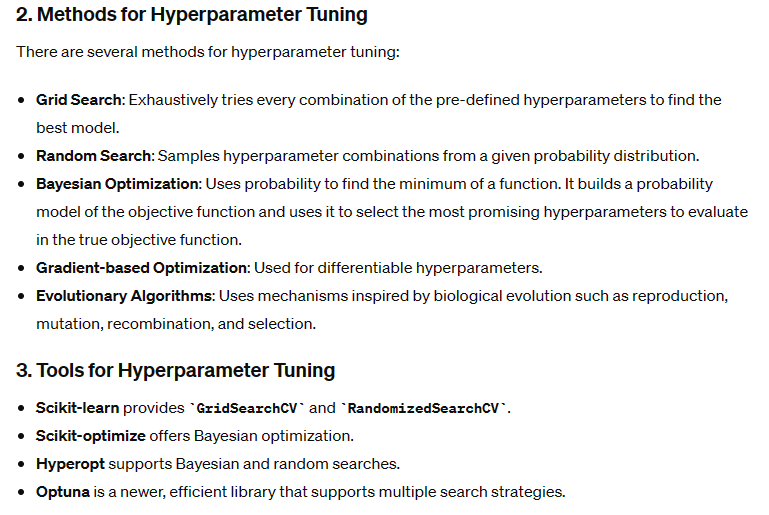

In [ ]:
# I PUT ALL THESE IMAGES IN THE FOULDER HYPERPARAMETER TUNING (FROM CHATGPT). HAVE A LOOK THERE

# RANDOM SHIT